<a href="https://colab.research.google.com/github/g-roger/eda-desafio-led/blob/main/eda_desafio_led.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import datetime

In [ ]:
pd.set_option('display.max_colwidth',100)
pd.set_option('display.max_rows',300)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/analises/desafio_led.xlsx', 'base completa')
df_sel_80 = pd.read_excel('/content/drive/MyDrive/analises/desafio_led.xlsx', '80 selecionados')
df_sel_20 = pd.read_excel('/content/drive/MyDrive/analises/desafio_led.xlsx', '20 selecionados')
df_sel_10 = pd.read_excel('/content/drive/MyDrive/analises/desafio_led.xlsx', '10 selecionados')

In [ ]:
df.shape, df_sel_80.shape, df_sel_20.shape, df_sel_10.shape

((323, 16), (78, 17), (20, 17), (10, 17))

In [ ]:
df.rename(columns={
    'Start time': 'data_inicio',
    'Completion time': 'data_fim',
    'Digite o seu nome completo:': 'nome',
    'Data de nascimento:\n\nUtilize o formato dia/mês/ano': 'data_nascimento',
    'E-mail principal de contato:': 'email',
    'Celular de contato:\n\nDigite o número com o DDD e o código da operadora.\nex: (11) 00000-0000\n': 'celular',
    'Sexo da pessoa responsável pela iniciativa:': 'sexo',
    'Raça/etnia da pessoa responsável pela iniciativa:': 'etnia',
    'A pessoa responsável pela iniciativa possui alguma deficiência?': 'deficiencia',
    'Nome da instituição de ensino que está matriculado(a):\n\nExemplo: USP - Universidade de São Paulo': 'instituicao',
    'Nome do curso em que está matriculado:': 'curso',
    'Como soube do desafio LED - Me dá uma luz aí?': 'track_candidato',
    'Estado de residência/moradia:': 'estado',
    ' Para finalizar, selecione abaixo as categorias/temas que se relacionam com o sua intervenção:': 'temas',
    'Cidade de residência:\n\nExemplo: "Mauá/SP"': 'cidade',
    'Conte qual o maior problema que você enfrentou ou enfrenta na sua trajetória educacional e crie uma solução para resolvê-lo.\n(até 2000 caracteres)\n\nUse esse campo para detalhar, dar exemplos e con...': 'texto_inscricao',
}, inplace=True)


In [ ]:
df.columns

Index(['data_inicio', 'data_fim', 'nome', 'data_nascimento', 'email',
       'celular', 'sexo', 'etnia', 'deficiencia', 'instituicao', 'curso',
       'track_candidato', 'estado', 'cidade', 'texto_inscricao', 'temas'],
      dtype='object')

In [ ]:
def find_step(name):
  name = name.lower()
  if name in [i.lower() for i in df_sel_10['Digite o seu nome completo:'].values]: 
    return 3
  elif name in [i.lower() for i in df_sel_20['Digite o seu nome completo:'].values]:
    return 2
  else:
    return 1


In [ ]:
idade = lambda x: datetime.datetime.today().year - x.year

In [ ]:
df['idade'] = df.data_nascimento.apply(idade)

In [ ]:
df['ultima_etapa'] = df['nome'].apply(find_step)

In [ ]:
#limpar temas
df.temas.replace('Planejamento Educacional ', 'Planejamento Educacional', inplace=True)
df.temas.replace('Economia Colaborativa ', 'Economia Colaborativa', inplace=True)
df.temas.replace('Gestão e Administração ', 'Gestão e Administração', inplace=True)
df.temas.replace('Desenvolvimento cognitivo ', 'Desenvolvimento cognitivo', inplace=True)
df.temas.replace('Compreensão digital ', 'Compreensão digital', inplace=True)
df.drop(df[df.temas == 'teste'].index, inplace=True)
#df.temas.replace('Compreensão digital ', 'Compreensão digital', inplace=True)
df['temas_resume'] = df.temas.apply(lambda x: x[:80])

In [ ]:
def get_barplot_by_columns(col, percentual=False, tamanho=(20, 15), top=55):  
  data = df[col].value_counts(normalize=percentual).nlargest(top).sort_values(ascending=False)
  plt.figure(figsize=tamanho)
  ax = sns.barplot(x=data.index, y=data.values)
  ax.tick_params(axis='x', rotation=90)
  r = 'Percentual' if percentual else 'Quantidade'
  ax = ax.set(title=f'{r} de inscrições por {col}')
  #data.plot.bar()
  return plt.show()

In [ ]:
tv = ['TV', 'Tv', 'Jornal', 'Jornal da Globo', 'Bom dia SP', 'Globo', 'Propagenada TV', 'Jornal (Bom Dia São Paulo)', 'gnt', 'Propaganda de TV na Rede Globo', 'SPTV1', 'Jornal A Tribuna', 'SPTV', 'GLOBO', 'BRASA', 'JORNAL', 'TELEVISÃO', 'Tv aberta', 'Jornal/Televisão',
      'jornal na tv', ' Televisão', 'Pela Globo', 'Reportagem do Bom Dia São Paulo', 'jornal', 'Reportagem SPTV', 'Reportagem', 'Notícia', 'Comercial TV Globo', 'Televisão (Telejornal)', 'Jornais TV Globo', 'Jornal da Rede Globo', 'TV GLOBO', 'Notícias', 'Rede Globo de televisão',
      'Rede Amplia', 'Bom dia São Paulo', 'Grupo Globo', 'globo', 'Jornal Nacional', 'Jornal Da Globo', 'Bom dia São Paulo', 'Em um dos tele jornais da rede Globo', 'Jornal na TV', 'Canal Conecta da Globo', 'tv/jornal', 'Televisão ', 'tv/jornal', 'Propaganda na TV',
      'Sptv', 'TV Globo ', 'TV Globo', 'Bom dia São Paulo', 'Bom dia São Paulo ', 'TV Globo - Bom dia, SP ', 'TV Globo - Bom dia, SP', 'sptv ', ' sptv', 'sptv', 'Globo SP ', 'Globo SP', 'Jornal SPTV', 'Jornal SPTV ', 'INTRANET RPC ', ' INTRANET RPC', 'Comercial na TV']
indicacao = ['Indicação de terceiros', 'Família', 'Professora', 'Amigos', 'Amiga', 'Meu professor de Calculo Vetorial que me enviou o Link', 'Uma professora nos enviou o link referente ao desafio', 'AMIGOS', 'amigos do curso', 'Indicação da Instituição', 'indicação de uma amiga',
             'Grupo de trabalho', 'INTRANET RPC', 'Colega de Trabalho', 'colegas', 'Pela faculdade onde estudo', 'Amigos fizeram divulgação', 'Meu irmão', 'PELA INSTITUIÇÃO DE ENSINO', 'grupo de comunicação da faculdade', 'Whatsapp', 'WhatsApp', 'Vi uma reportagem na televisão',
             'INTRANET RPC', 'Pelo coliga.digital', 'mandaram em um grupo de whatsapp', 'whatsapp ', 'Whatsapp ', 'Compartilhamento do link da notícia via Classroom', 'Pela faculdade onde estudo.', 'Meu irmão', 'WhatsApp', 'WhatsApp ', ' WhatsApp', 'Recomendação', 'Meu irmão', ' Meu irmão', 'Meu irmão ', 'Indicação',
              'whatsapp  ', ' whatsapp', 'whatsapp ', 'whatsapp']
internet = ['Site G1-Educação', 'G1', 'Google', 'Link Tecnologia Social', 'Internet', 'G1.com', 'Google ', ' Google']
redes = ['Facebook', 'LinkedIn', 'Instagram']
df.track_candidato.apply(lambda x: df.track_candidato.replace(x, 'Televisão', inplace=True) if x in tv else df.track_candidato.replace(x, 'Indicação de terceiros', inplace=True) if x in indicacao else df.track_candidato.replace(x, 'Internet', inplace=True) if x in internet else df.track_candidato.replace(x, 'Redes Sociais', inplace=True) if x in redes else x)
df.track_candidato.value_counts()

Televisão                 108
Redes Sociais              60
Site do Movimento LED      44
Indicação de terceiros     34
Não coletado               34
E-mail Marketing           24
Internet                   18
Name: track_candidato, dtype: int64

In [ ]:
ads = ['análise e desenvolvimento de sistemas', 'análise e desenvolvimento de sistema', 'ads', 'análise de desenvolvimento de sistemas']

In [ ]:
df.curso = df.curso.apply(lambda x: x.lower())

In [ ]:
df.curso.apply(lambda x: df.curso.replace(x, 'análise e desenvolvimento de sistemas', inplace=True) if x in ads else df.track_candidato.replace(x, 'letras', inplace=True) if 'letras' in x else x)


0                psicopedagogia
1                     pedagogia
2                   psicologia 
3             gestão de eventos
4           engenharia mecânica
                 ...           
318    pós graduação em direito
319                admnistração
320                fisioterapia
321                  enfermagem
322       ciência da computação
Name: curso, Length: 322, dtype: object

In [ ]:
df['tipo do curso'] = df.curso.apply(lambda x: 'Mestrado' if 'mestrado' in x else 'Doutorado' if 'doutorado' in x else 'Ensino Médio' if 'ensino médio' in x or 'segundo gral' in x or 'segundo grau' in x else 'Ensino Fundamental' if 'ensino fundamental' in x or 'fundamental' in x else 'Graduação')

In [ ]:
df.curso.value_counts().nlargest(10)


pedagogia                                20
psicologia                               11
direito                                   9
administração                             7
ciência da computação                     6
licenciatura em pedagogia                 4
gestão de recursos humanos                4
medicina                                  4
serviço social                            4
análise e desenvolvimento de sistemas     4
Name: curso, dtype: int64

### Distribuição por Quantidade

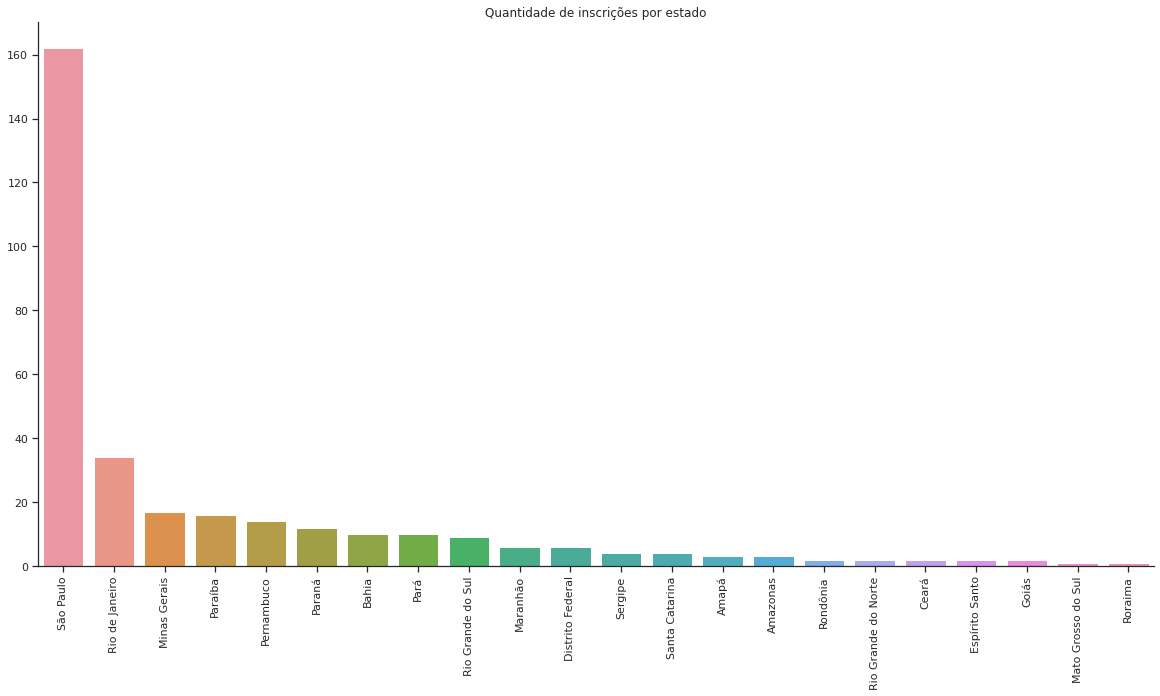

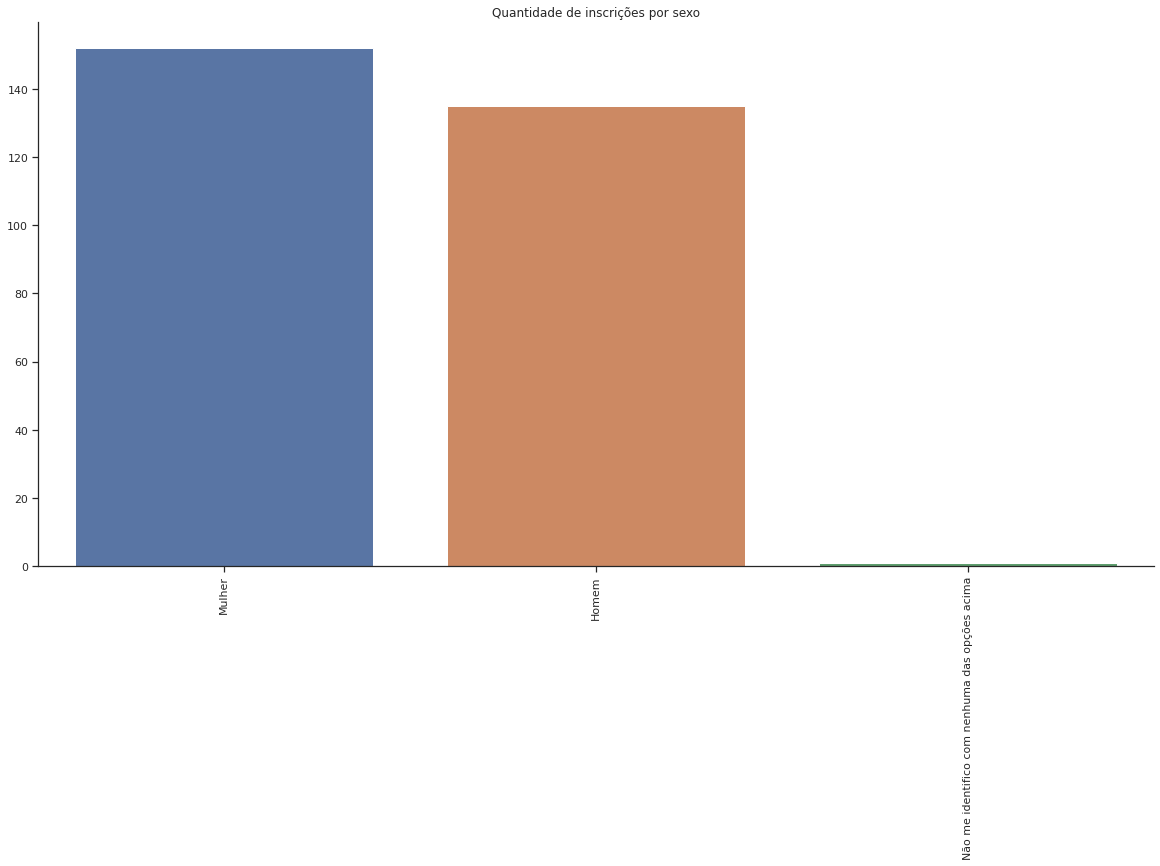

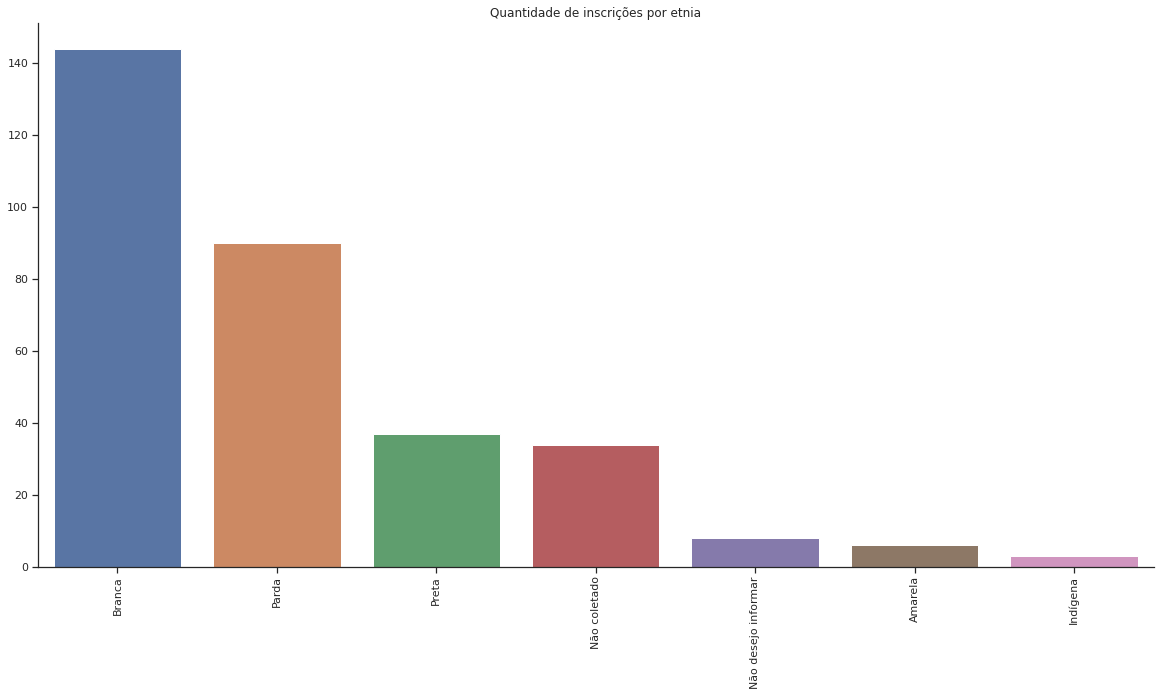

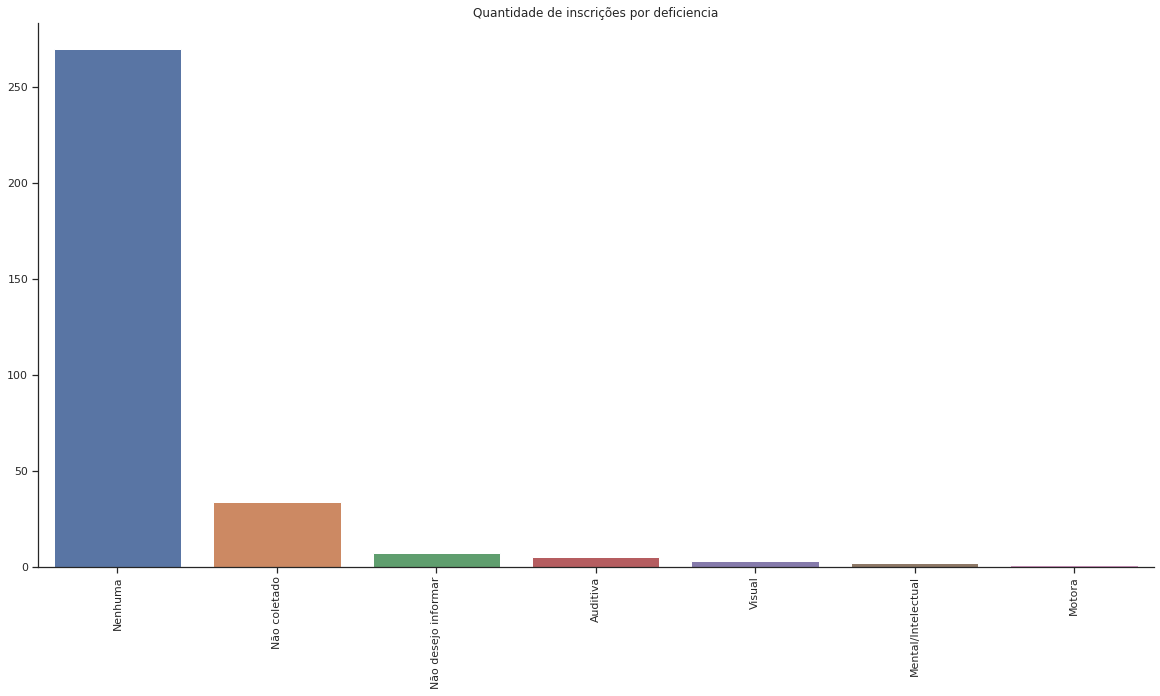

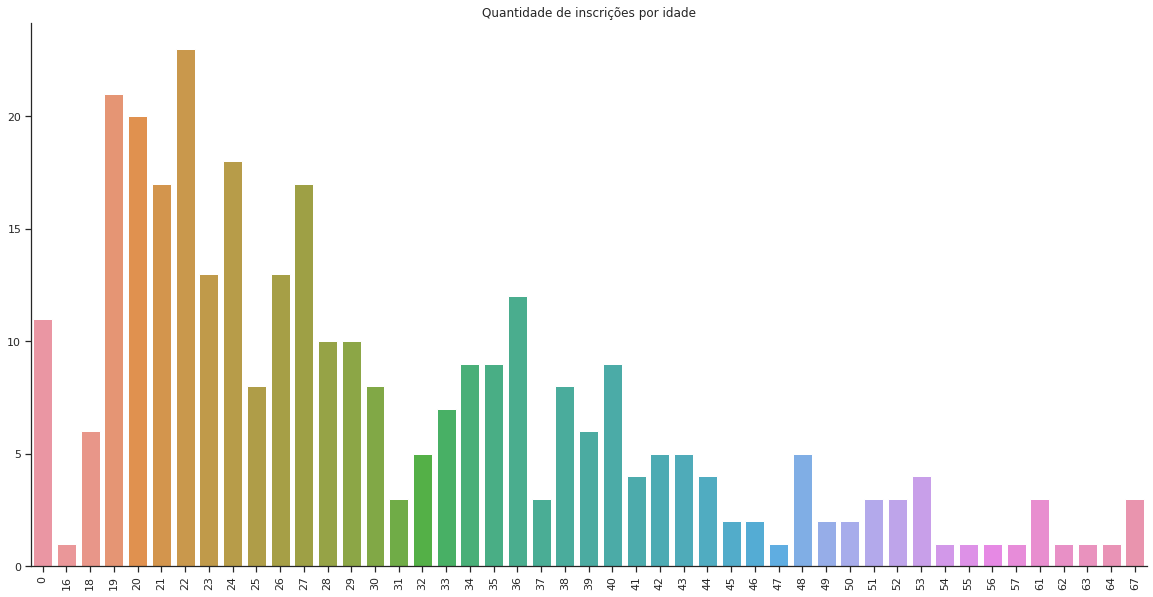

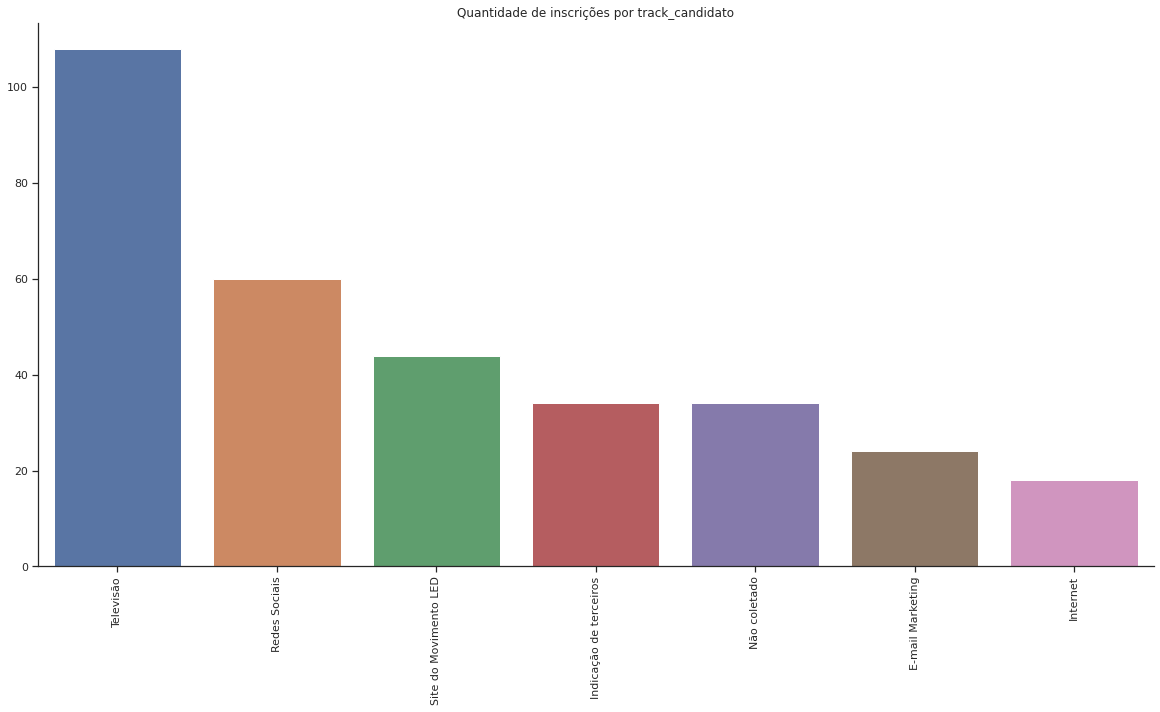

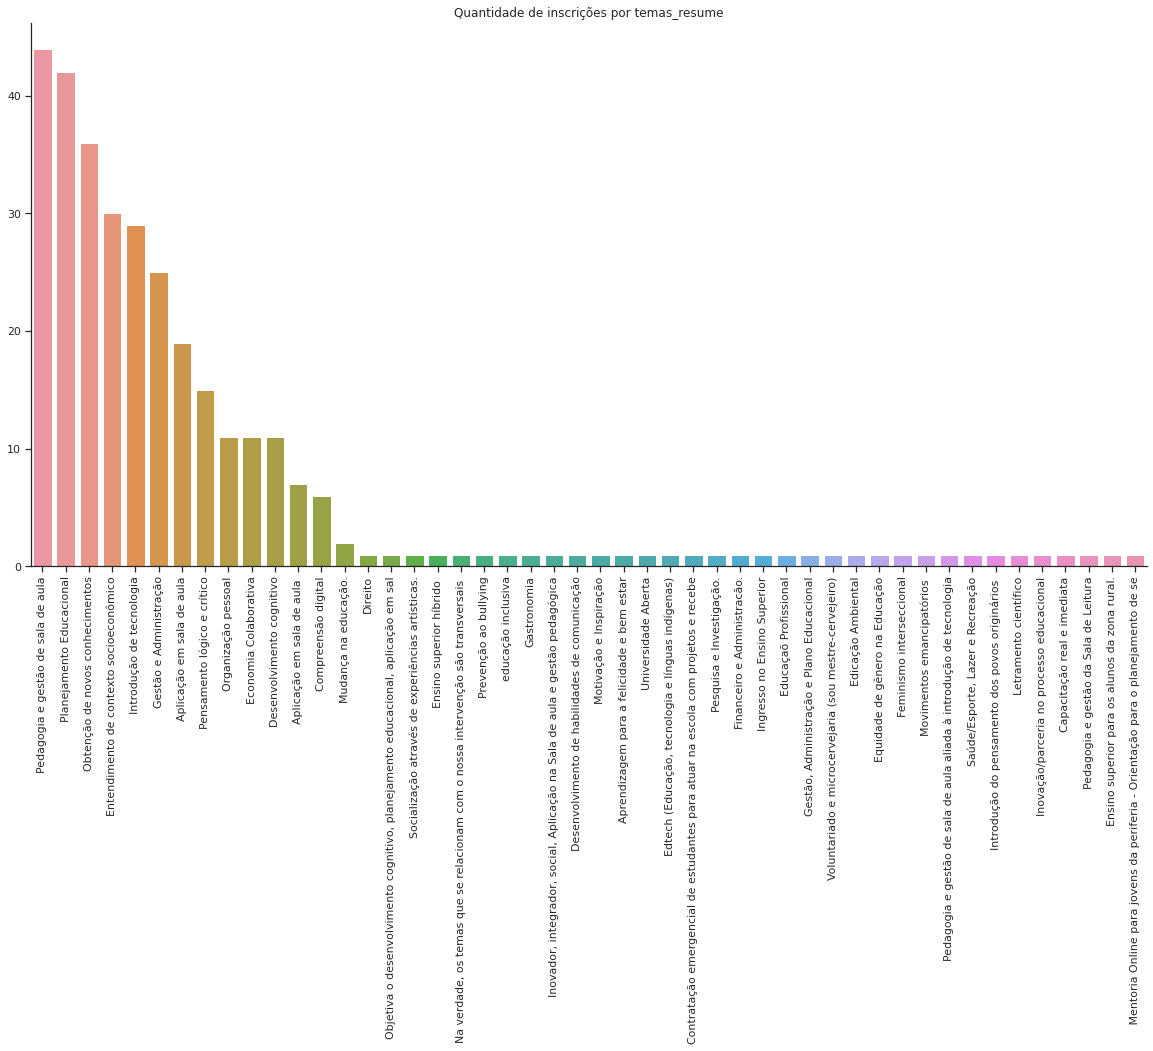

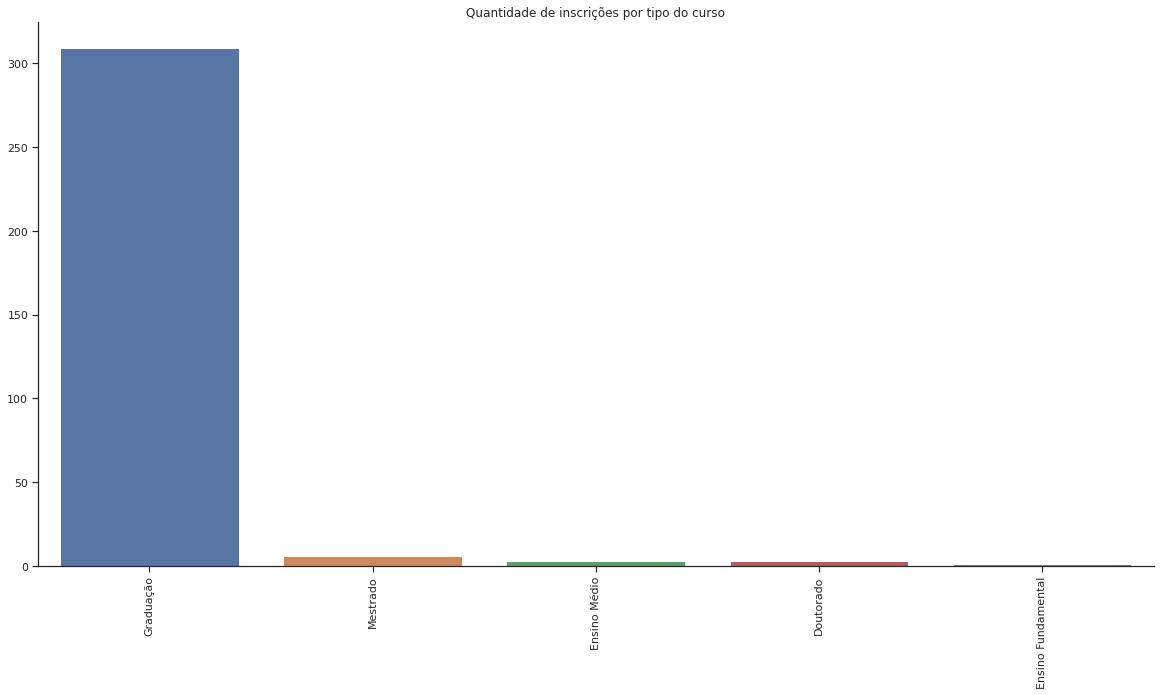

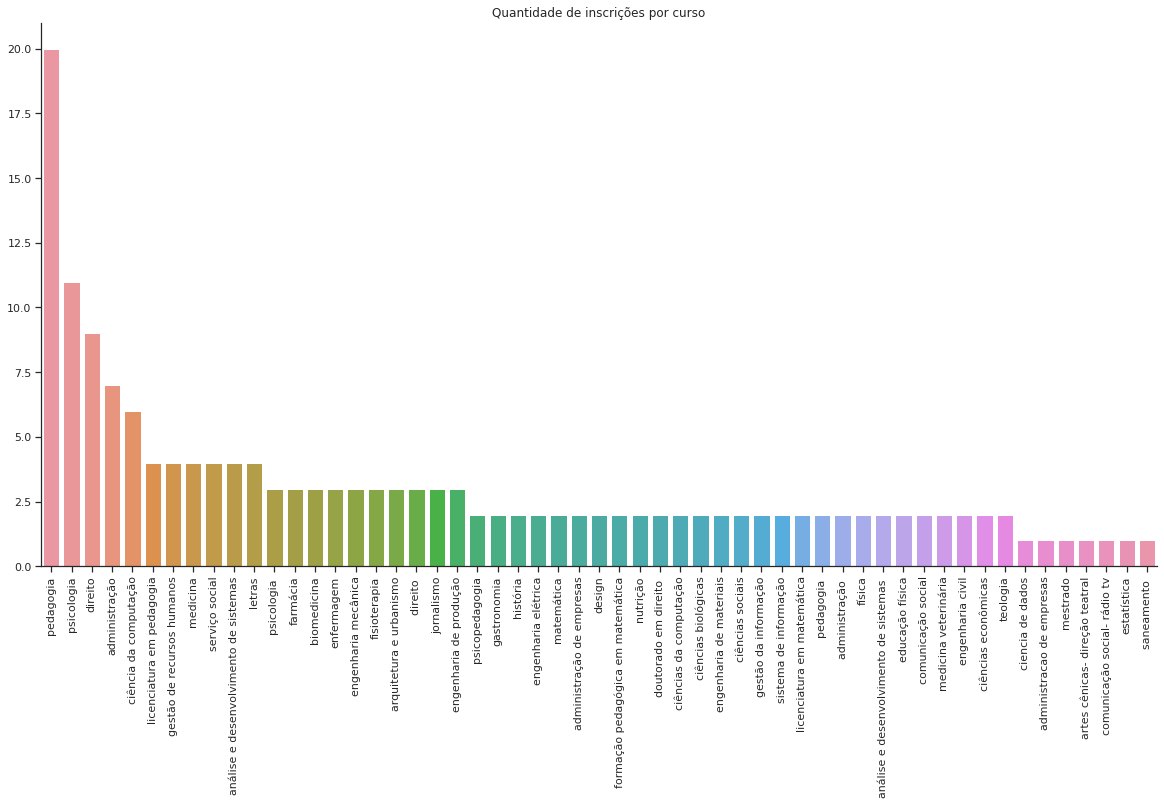

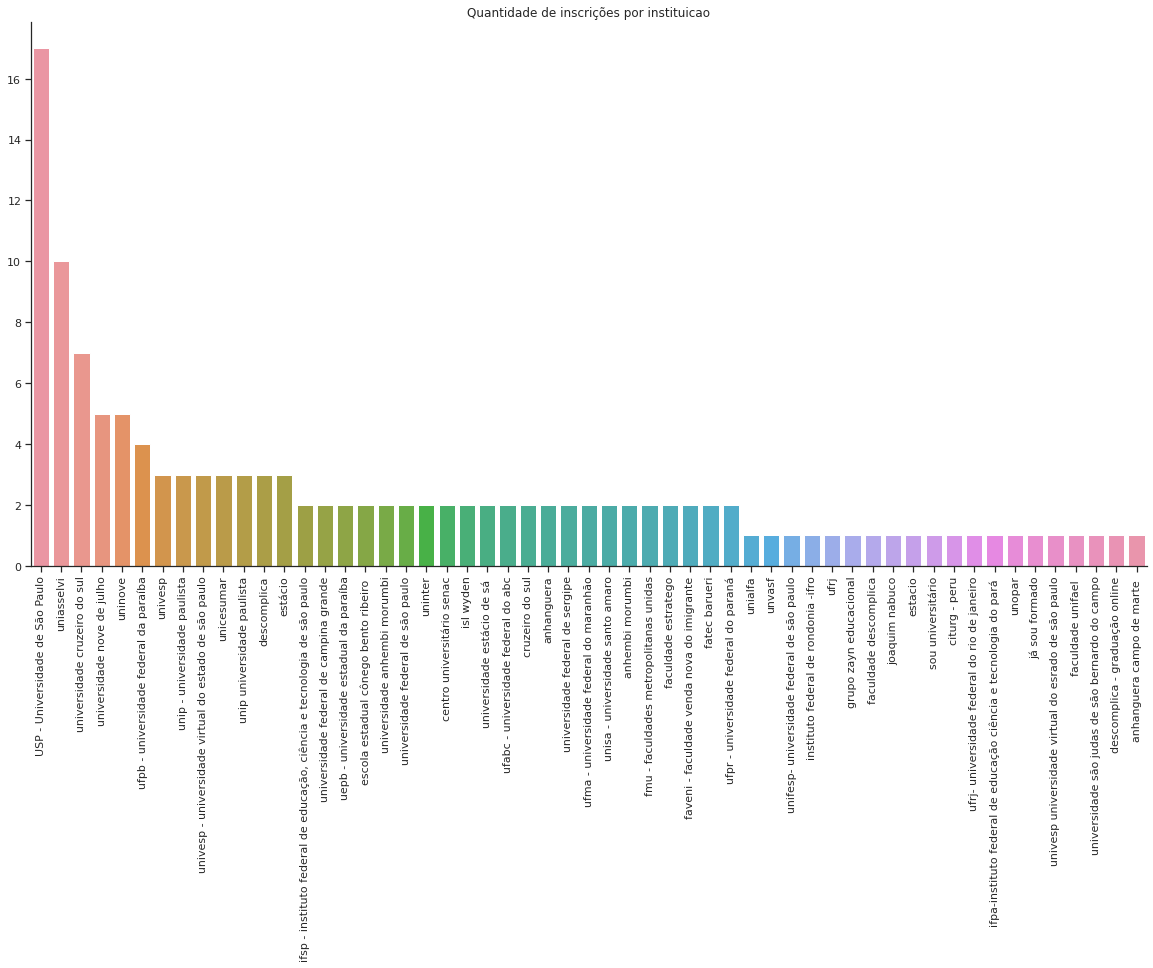

In [ ]:
bar_columns = ['estado', 'sexo', 'etnia', 'deficiencia',  'idade', 'track_candidato', 'temas_resume', 'tipo do curso', 'curso', 'instituicao']
for col in bar_columns:
  print('\n\n\n')
  get_barplot_by_columns(col, percentual=False, tamanho=(20, 10), top=55)

### Distribuição por percentual

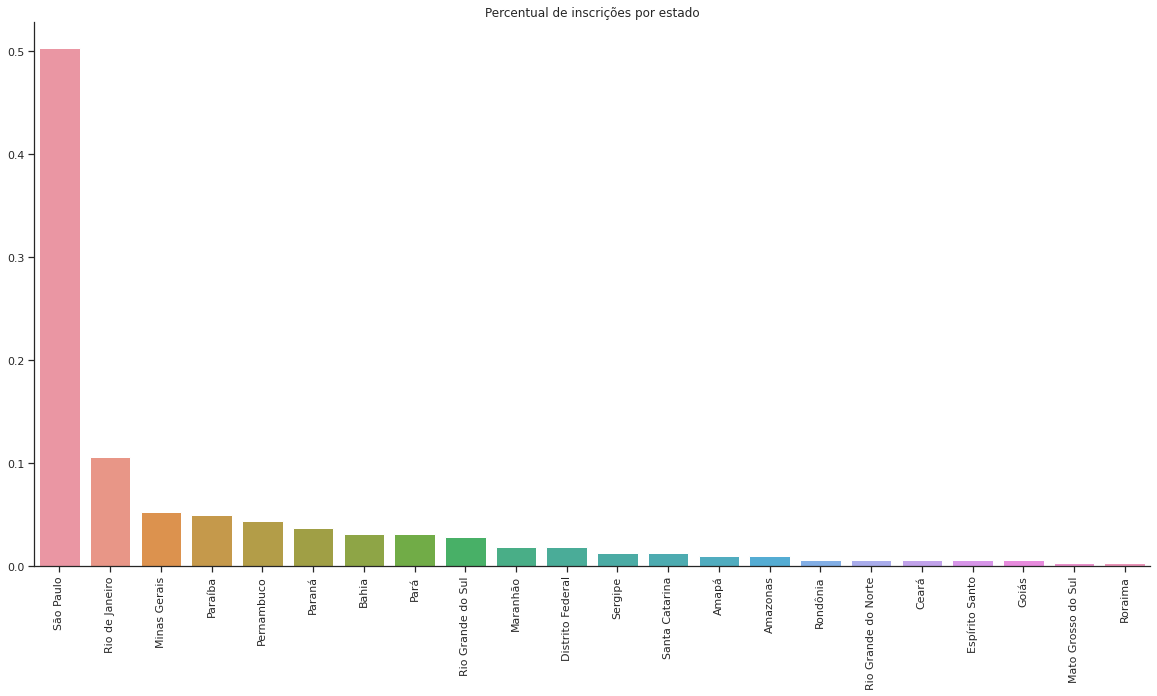

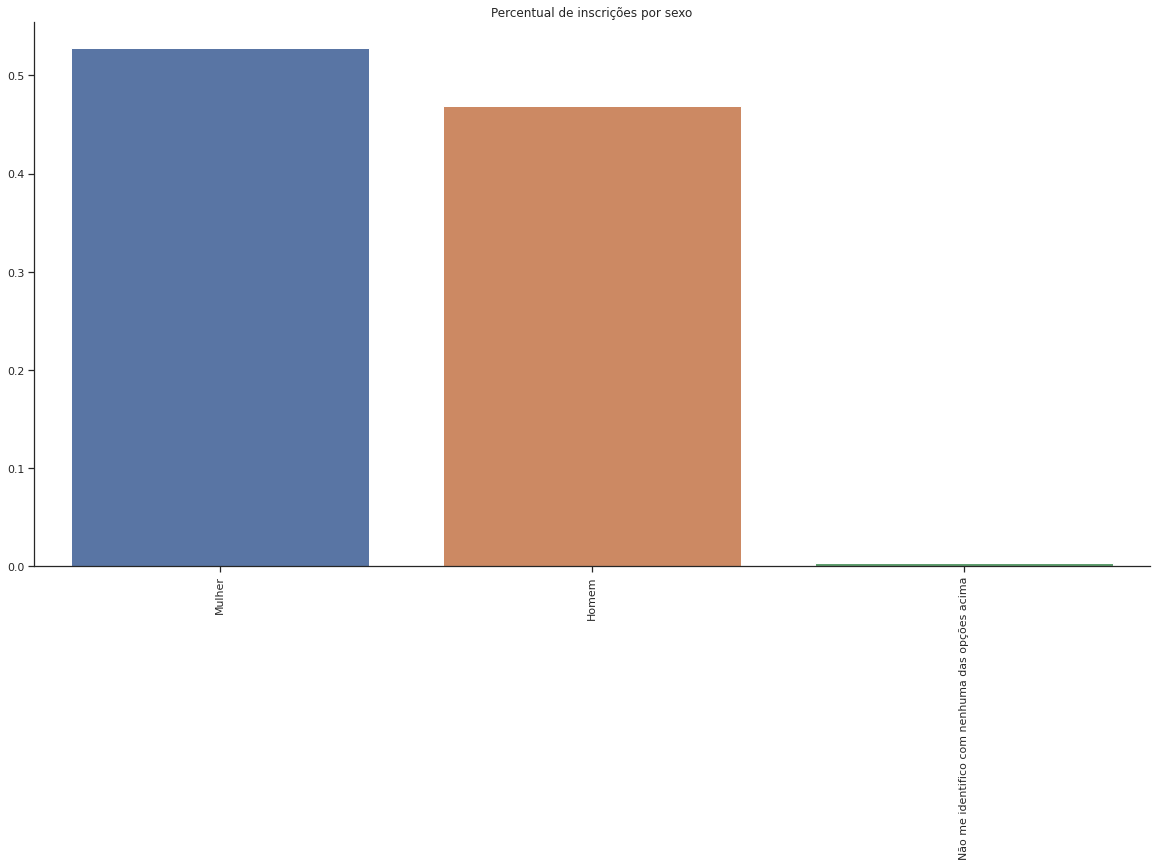

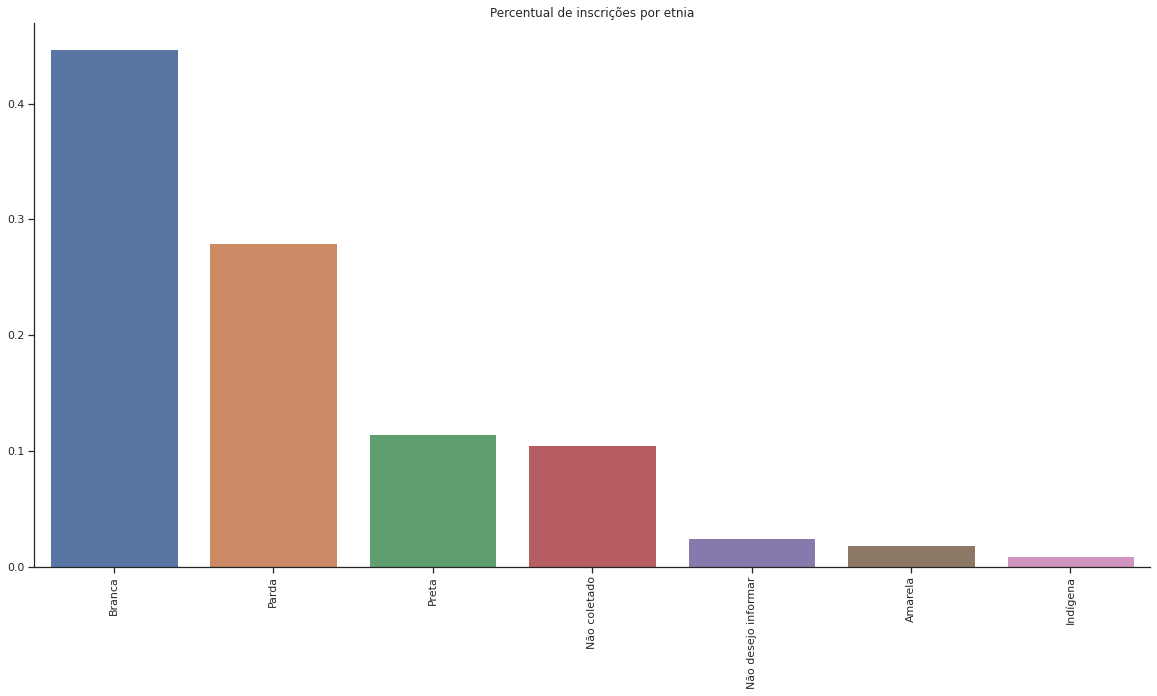

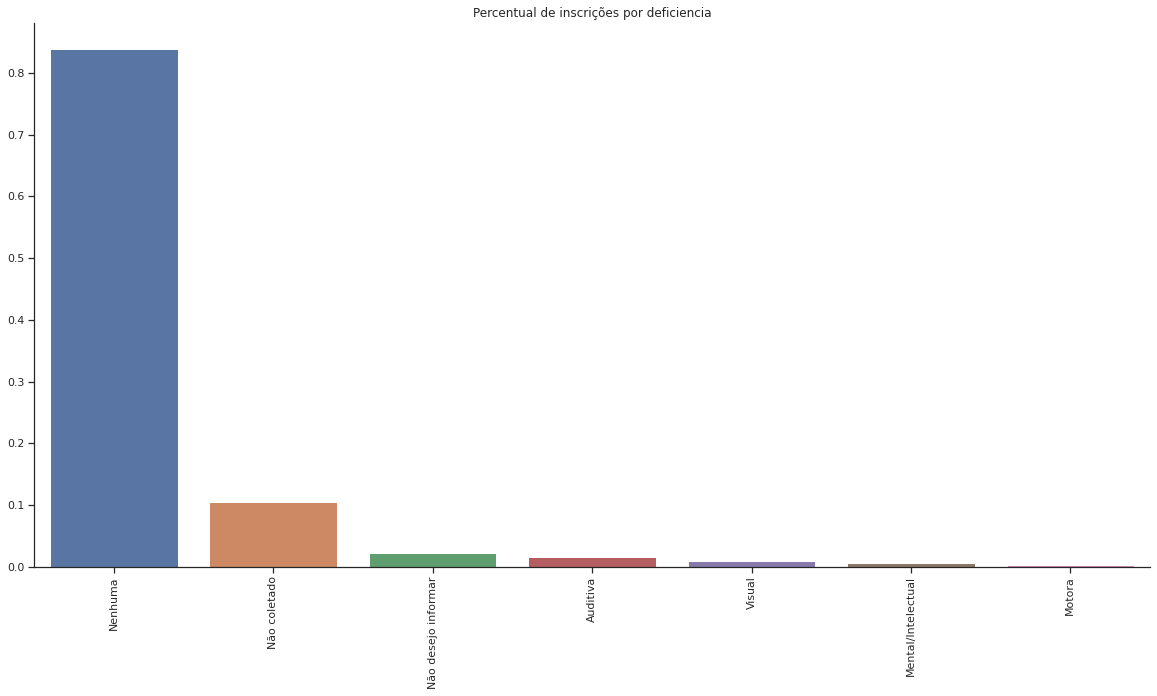

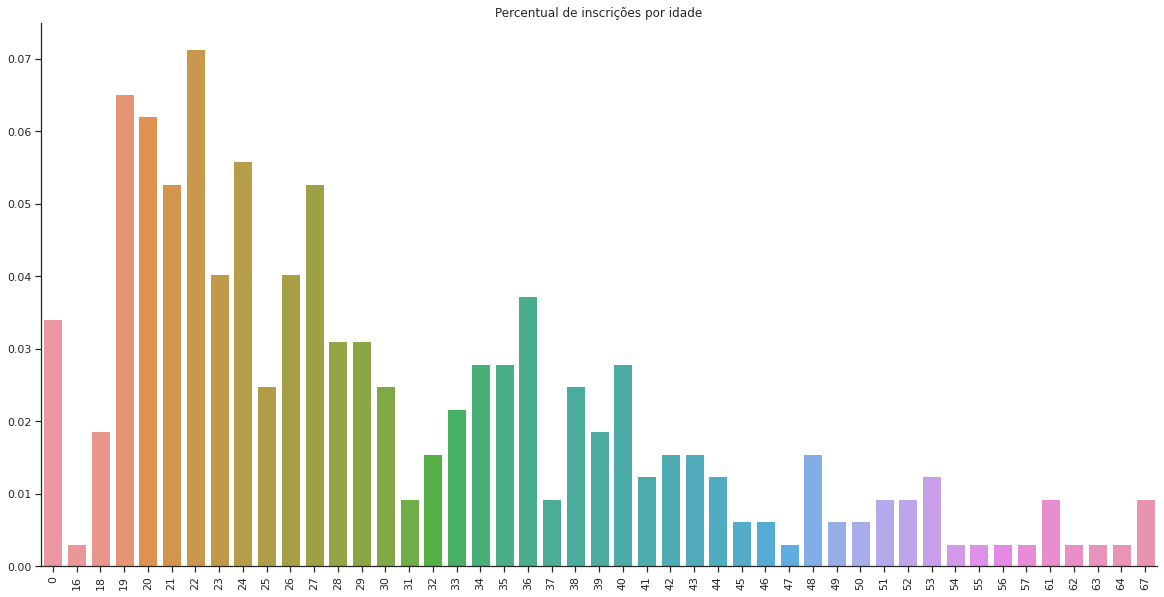

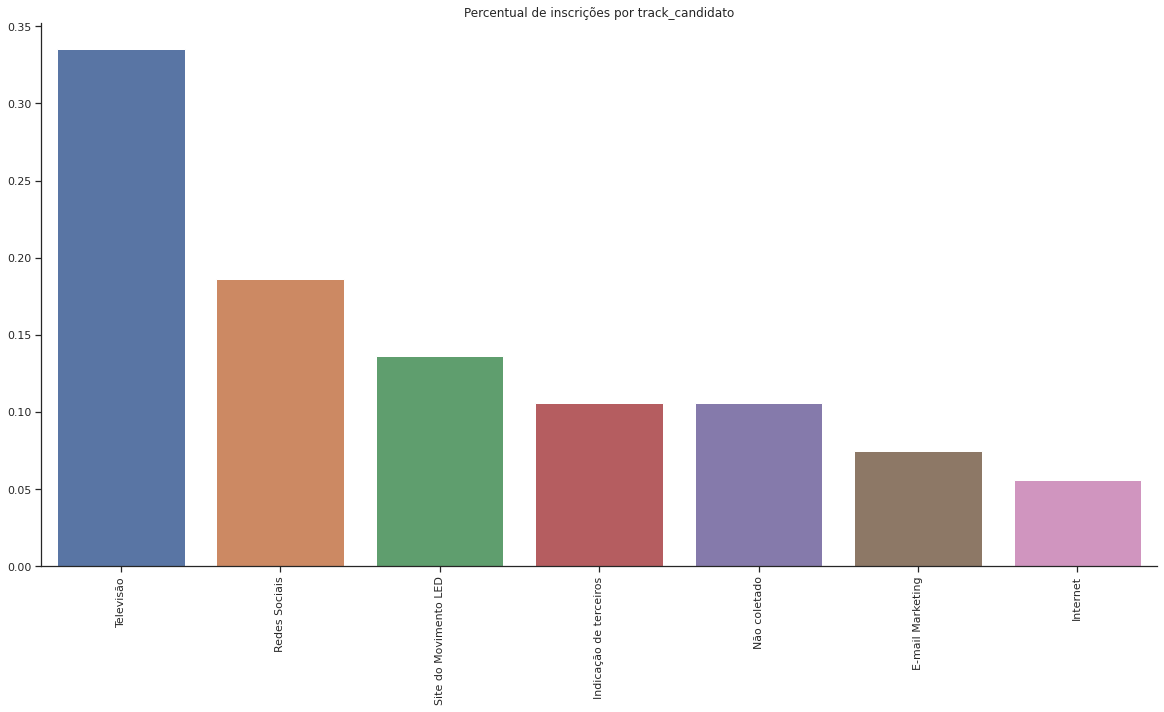

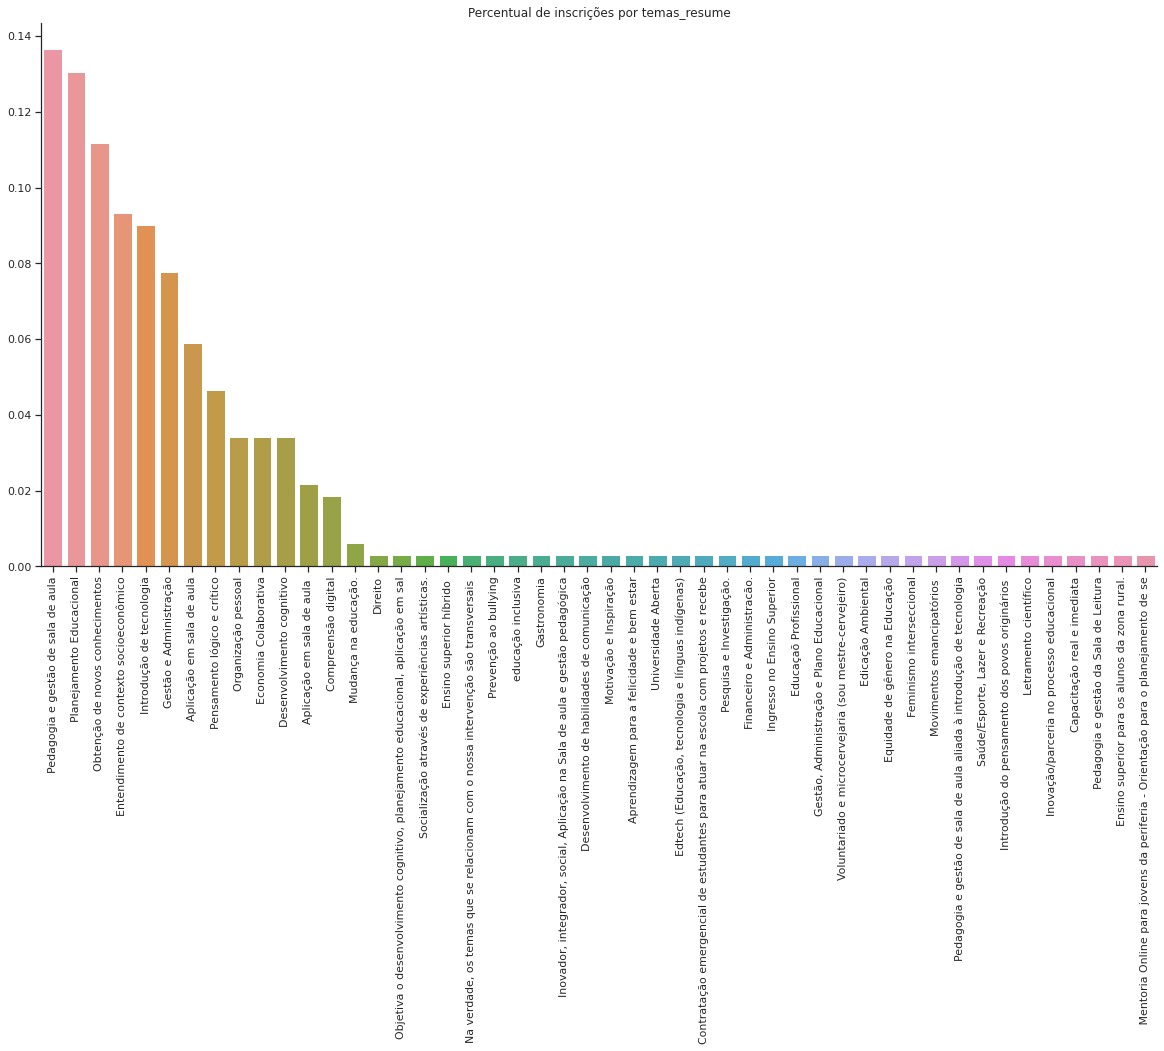

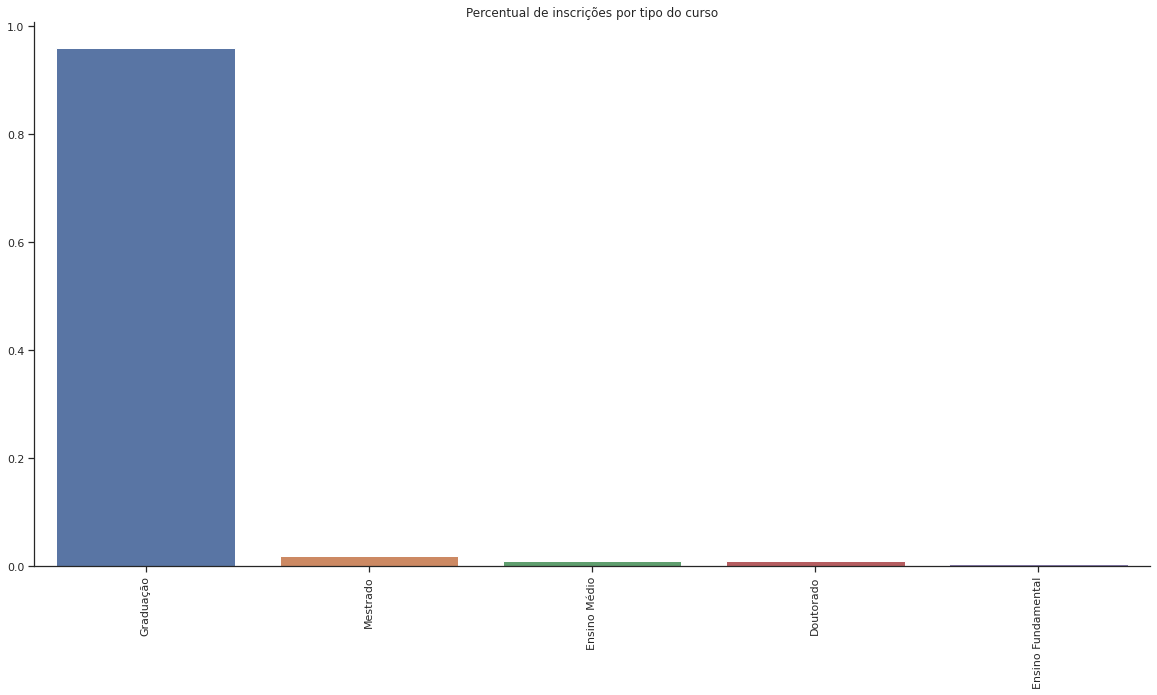

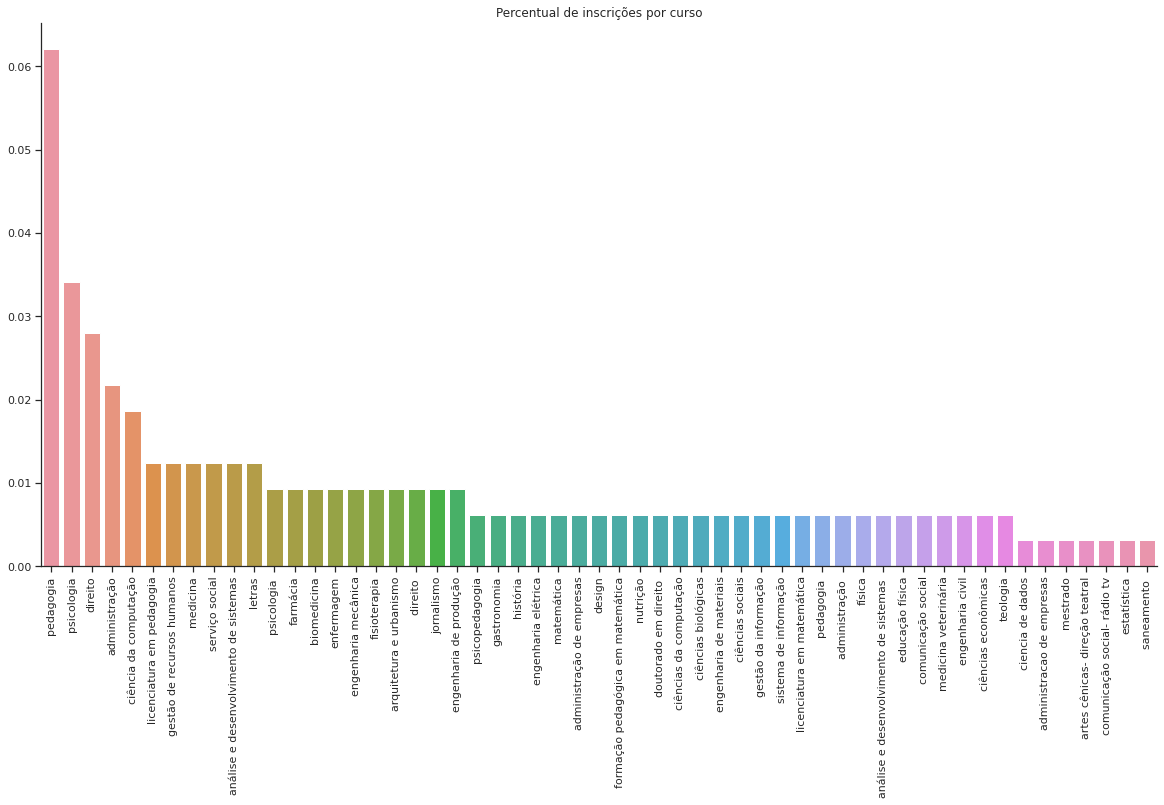

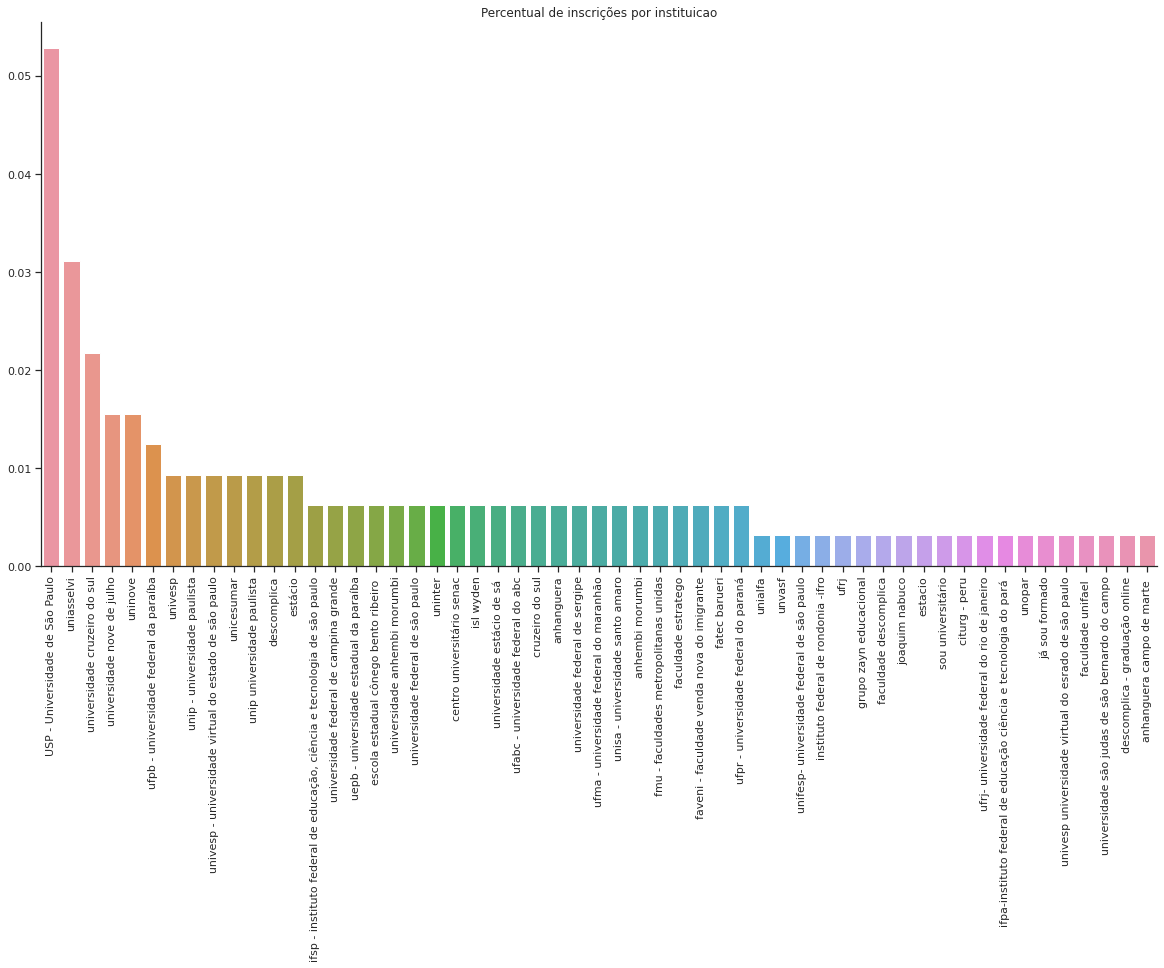

In [ ]:
bar_columns = ['estado', 'sexo', 'etnia', 'deficiencia',  'idade', 'track_candidato', 'temas_resume', 'tipo do curso', 'curso', 'instituicao']
for col in bar_columns:
  print('\n\n\n')
  get_barplot_by_columns(col, percentual=True, tamanho=(20, 10), top=55)

### Nuvem de Palavras

In [ ]:
!python -m spacy download pt
!pip install -U spacy
!pip install pt_core_news_sm
nltk.download('stopwords')
nltk.download('punkt')
import spacy


2022-09-05 17:37:59.093703: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
⚠ As of spaCy v3.0, shortcuts like 'pt' are deprecated. Please use the
full pipeline package name 'pt_core_news_sm' instead.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.0 MB 26.9 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
nlp = spacy.load("pt_core_news_sm")

In [ ]:
df['texto_inscricao_caracteres'] = df['texto_inscricao'].apply(lambda x: len(str(x)))


In [ ]:
texto = " ".join(str(txt) for txt in df.texto_inscricao)

In [ ]:
sentences = nltk.sent_tokenize(texto)

In [ ]:
stop_words = list(set(nlp.Defaults.stop_words).union(set(nltk.corpus.stopwords.words('portuguese'))))

In [ ]:
texto_novo = []
for i in sentences:
  if i not in stop_words:
    texto_novo.append(i)

In [ ]:
texto_novo_join = " ".join(str(txt) for txt in texto_novo)

In [ ]:
word_cloud = WordCloud(collocations = True, background_color = 'black').generate(texto_novo_join)

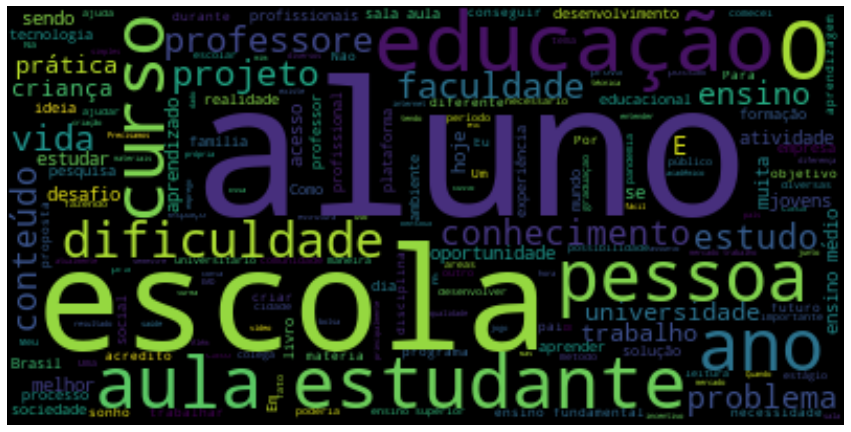

In [ ]:
plt.figure(figsize=(15, 20))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()